# Experimentos com dados

Setup: https://github.com/lucasew/uv-jupyter-kernel
Python: 3.10

In [87]:
!uv pip install --no-progress requests pandas matplotlib

Resolved 19 packages in 316ms
Prepared 2 packages in 222ms
Installed 7 packages in 26ms
 + contourpy==1.3.2
 + cycler==0.12.1
 + fonttools==4.60.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.6
 + pillow==11.3.0
 + pyparsing==3.2.5


In [19]:
import requests
import pandas as pd
from collections import defaultdict

In [81]:
data['parameters']

{'T2M': {'units': 'C', 'longname': 'Temperature at 2 Meters'},
 'RH2M': {'units': '%', 'longname': 'Relative Humidity at 2 Meters'},
 'WS10M': {'units': 'm/s', 'longname': 'Wind Speed at 10 Meters'},
 'T2MDEW': {'units': 'C', 'longname': 'Dew/Frost Point at 2 Meters'},
 'PRECTOTCORR': {'units': 'mm/hour', 'longname': 'Precipitation Corrected'}}

In [82]:
def get_weather_data(lat, lon, start, end):
    data = requests.get(
        'https://power.larc.nasa.gov/api/temporal/daily/point',
         params={
                'community': 'ag',
                'parameters': 'T2M,RH2M,WS10M,T2MDEW,PRECTOTCORR',
                'latitude': lat,
                'longitude': lon,
                'start': start,
                'end': end,
                'format': 'json',
                'units': 'metric',
                'header': 'true'
         }
    ).json()
    # print(data)

    items = defaultdict(lambda: {})
    for k, v in data['properties']['parameter'].items():
        for dt, val in v.items():
            items[dt][k] = val
            items[dt]['date'] = dt
            items[dt]['latitude'] = lat
            items[dt]['longitude'] = lon

    def fill_value_to_nan(item):
        if item == data['header']['fill_value']:
            return float('nan')
        return item
    return pd.DataFrame(items.values()).map(fill_value_to_nan).dropna()


<Axes: xlabel='date'>

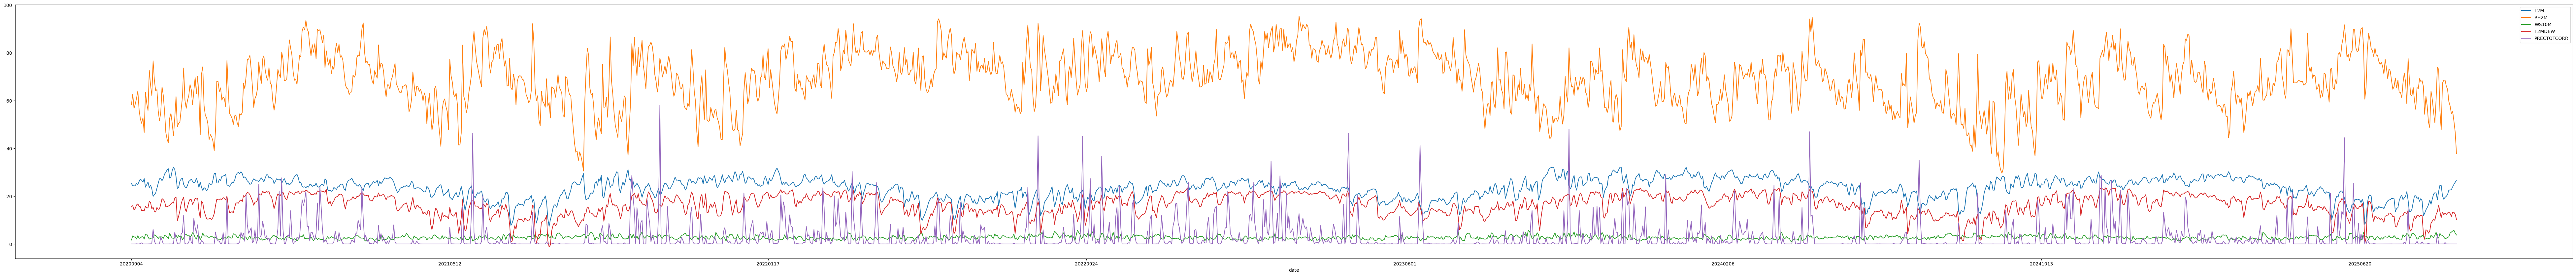

In [92]:
d = get_weather_data(-23, -52, '20200904', '20250904')
d.plot(figsize=(100,10), legend=True, x='date', y=['T2M', 'RH2M', 'WS10M', 'T2MDEW', 'PRECTOTCORR'])

In [74]:
get_weather_data(22, 22, '20251003', '20251003').dropna()

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [22.0, 22.0, 516.44]}, 'properties': {'parameter': {'T2M': {'2025100300': -999.0, '2025100301': -999.0, '2025100302': -999.0, '2025100303': -999.0, '2025100304': -999.0, '2025100305': -999.0, '2025100306': -999.0, '2025100307': -999.0, '2025100308': -999.0, '2025100309': -999.0, '2025100310': -999.0, '2025100311': -999.0, '2025100312': -999.0, '2025100313': -999.0, '2025100314': -999.0, '2025100315': -999.0, '2025100316': -999.0, '2025100317': -999.0, '2025100318': -999.0, '2025100319': -999.0, '2025100320': -999.0, '2025100321': -999.0, '2025100322': -999.0, '2025100323': -999.0}, 'RH2M': {'2025100300': -999.0, '2025100301': -999.0, '2025100302': -999.0, '2025100303': -999.0, '2025100304': -999.0, '2025100305': -999.0, '2025100306': -999.0, '2025100307': -999.0, '2025100308': -999.0, '2025100309': -999.0, '2025100310': -999.0, '2025100311': -999.0, '2025100312': -999.0, '2025100313': -999.0, '2025100314': -999.0, '202510

,T2M,date,latitude,longitude,RH2M,WS10M,T2MDEW,PRECTOTCORR
